# Development for Week 8 Session: Bivariate Copula with Non-Gaussian Margins

See also [Ross (2023)](https://www.sciencedirect.com/science/article/pii/B9780323857383000110) Section 6.3 for theorems, proofs and comments on the bivariate case, also consistency of $\rho$.

## [Aas et al., (2009)](https://www.sciencedirect.com/science/article/pii/S0167668707000194?via%3Dihub)

This is the notation from the reference [Aas et al., (2009)](https://www.sciencedirect.com/science/article/pii/S0167668707000194?via%3Dihub).

Bivariate distribution $F$:
$$
F(x_1,x_2)=C\left[F_1(x_1),F_2(x_2)\right]
$$
Copula:
$$
C(u_1,u_2)=F\left[F_1^{-1}(u_1), F_2^{-1}(u_2)\right]
$$

Joint density:
$$
f(x_1,x_2)=c_{12}\left[F_1(x_1), F_2(x_2)\right]f_1(x_1)f_2(x_2)
$$

Bivariate Gaussian copula density
$$
c(u_1,u_2)=\frac{1}{\sqrt{1-\rho_{12}}}\exp{\left[-\frac{\rho_{12}^2(x_1^2+x_2^2)-2\rho_{12}x_1x_2}{2(1-\rho_{12}^2)}\right]}
$$
where $\rho_{12}$ is the copula parameter, $x_1=\Phi^{-1}(u_1)$, $x_2=\Phi^{-1}(u_2)$ and $\Phi^{-1}(\cdot)$ are inverses of the standard univariate Gaussian distribution function.

## Gaussian Bivariate Copula

Now using slightly different notation (should align with cross-over this way)

$$ 
(u,v) \in [0,1]^2
$$

$$
C_{U,V}(u,v)=\Phi \left[u, v \right]=\Phi \left[\Phi^{-1}(u), \Phi^{-1}(v) \right] \\
\qquad \\
c_{U,V}(u,v)=\frac{1}{\sqrt{1-\rho_{12}}}\exp{\left[-\frac{\rho_{12}^2(z_1^2+z_2^2)-2\rho_{12}z_1z_2}{2(1-\rho_{12}^2)}\right]}
$$

where $\Phi(\cdot)$ is the CDF of the multivariate Gaussian distribution (bivariate, in this case) with parameter $\rho$ (for MUDE, simply the Pearson correlation coefficient **Is this always the case?**). To simplify notation, dummy variables are used: $z_1=\Phi^{-1}(u)$, $z_2=\Phi^{-1}(v)$.

$$
f(x_1,x_2)=c_{12}\left[F_1(x_1), F_2(x_2)\right]f_1(x_1)f_2(x_2)
$$
w and $\Phi^{-1}(\cdot)$ are inverses of the standard univariate Gaussian distribution function.




## What we need

Create a bivariate distribution, $F_{X_1,X_2}(x_1,x_2)$ for the random variables $X_1$ and $X_2$ (a random vector) that uses the Gaussian copula, $C$, with non-Gaussian margins, $F_{X_1}(x_1)$ and $F_{X_2}(x_2)$. The random variables of the copula are $u=F_{X_1}(x_1)$ and $v=F_{X_2}(x_2)$.

The CDF is simply:
$$
F_{X_1,X_2}(x_1,x_2) = C\left(F_{X_1}(x_1),F_{X_2}(x_2)\right) = C(u,v)
$$
Where $C$ is the standard normal Gaussian cumulative distribution function with parameter $\rho$ as the Pearson correlation coefficient. The random vector $(u,v)$ are the arguments of the compulat distribution and density functions and represent the coordinates of $(X_1,X_2)$ transformed to the uniform square:
$$ 
(u,v) \in [0,1]^2 \qquad (X_1,X_2) \in \mathbb{R}^2
$$

The Gaussian CDF can be implemented with [this Python function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html):
```
scipy.stats.multivariate_normal([0, 0], [[1, rho], [rho, 1]])
```
Evaluated using
```
<multivariate_normal_object>.cdf([cdf_of_X1_at_x1, cdf_of_X2_at_x2])
```
The PDF is 
$$
f(x_1,x_2)=c\left(F_{X_1}(x_1), F_{X_2}(x_2)\right)f_{X_1}(x_1)f_{X_2}(x_2)
$$
where $c$ is the standard normal Gaussian probability density function. To simplify notation, define $z_1$ and $z_2$.
$$
z_1=\Phi^{-1}\left(F_{X_1}(x_1)\right) \\
\qquad \\
z_2=\Phi^{-1}\left(F_{X_2}(x_2)\right) \\
\qquad \\
c(F_{X_1}(x_1),F_{X_2}(x_2))=c(u,v)=\frac{1}{\sqrt{1-\rho_{12}}}\exp{\left[-\frac{\rho_{12}^2(z_1^2+z_2^2)-2\rho_{12}z_1z_2}{2(1-\rho_{12}^2)}\right]}
$$

To sample the PDF:
1. Sample from $C$ to get realizations $(u, v)$ (method `multivariate_normal.rvs`)
2. Transform $(u, v)\rightarrow(X_1, X_2)$ using $X_1 = F_1^{-1}(u)$ and $X_2 = F_i^{-1}(v)$

In [13]:
# for helper.py
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import pyvinecopulib as cop

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
import scipy.stats as st

from helper import plot_contour

In [14]:
def bivar_cdf(x1, x2, rho, X1, X2):
    copula_uv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])
    u = X1.cdf(x1)
    v = X2.cdf(x2)
    z1 = norm.ppf(u)
    z2 = norm.ppf(v)
    print(u,v,z1,z2)
    return copula_uv.cdf([z1, z2])
    
def copula_pdf(z1, z2, rho):
    return np.exp(-(rho**2*(z1**2 + z2**2)-2*rho*z1*z2)/(2*(1 - rho**2)))/np.sqrt(1 - rho**2)

def bivar_pdf(x1, x2, rho, X1, X2):
    '''Blah
    
    scipy.stats distribution (rv_continuous)
    '''
    u = X1.cdf(x1)
    v = X1.cdf(x1)
    z1 = norm.ppf(u)
    z2 = norm.ppf(v)
    print(z1, z2)
    return copula_pdf(z1, z2, rho)*X1.pdf(x1)*X1.pdf(x1)

def bivar_rvs(N, rho, X1, X2):
    copula_uv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])
    sample = copula_uv.rvs(size=N)
    sample_X1 = X1.ppf(norm.cdf(sample[:,0]))
    sample_X2 = X2.ppf(norm.cdf(sample[:,1]))
    print(sample_X1.shape)
    return np.reshape([sample_X1, sample_X2], (N,2))

In [15]:
rho = 0.5
X1 = norm(5, 3)
X2 = norm(7, 1)

In [16]:
copula_pdf(1, 1, rho)

np.float64(1.6115144186156805)

In [17]:
# print(copula_uv.cdf([-10,-10]))
print(bivar_cdf(30, 100, rho, X1, X2))


1.0 1.0 inf inf
1.0


In [18]:
print(bivar_pdf(3, 9, rho, X1, X2))

-0.6666666666666666 -0.6666666666666666
0.015183333942614835


In [19]:
# plot_contour(bivar_dist, [0, 30, 0, 30], data=data.T);

(10000,)


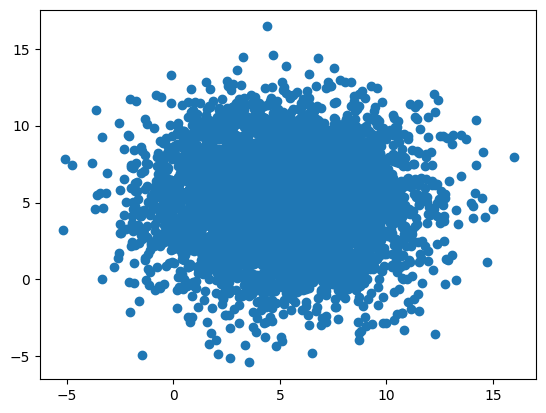

In [20]:
sample = bivar_rvs(10000, rho, X1, X2)
plt.scatter(sample[:,0], sample[:,1])

In [21]:
class Bivariate:
        
    def __init__(self, X1, X2, rho):
        self.X1 = X1
        self.X2 = X2
        self.rho = rho
        
    def cdf(self, x):
        x1 = x[0]
        x2 = x[1]
        copula_uv = multivariate_normal([0, 0], [[1, self.rho], [self.rho, 1]])
        u = self.X1.cdf(x1)
        v = self.X2.cdf(x2)
        z1 = norm.ppf(u)
        z2 = norm.ppf(v)
        return copula_uv.cdf([z1, z2])
    
    def copula_pdf(self, z1, z2):
        return np.exp(-(self.rho**2*(z1**2 + z2**2) - 2*self.rho*z1*z2)/(2*(1 - self.rho**2)))/np.sqrt(1 - self.rho**2)

    def pdf(self, x):
        '''Blah

        scipy.stats distribution (rv_continuous)
        '''
        x1 = x[0]
        x2 = x[1]
        u = self.X1.cdf(x1)
        v = self.X2.cdf(x1)
        z1 = norm.ppf(u)
        z2 = norm.ppf(v)
        return self.copula_pdf(z1, z2, self.rho)*X1.pdf(x1)*X1.pdf(x1)

    def rvs(self, size=1):
        copula_uv = multivariate_normal([0, 0], [[1, self.rho], [self.rho, 1]])
        sample = copula_uv.rvs(size=size)
        sample_X1 = self.X1.ppf(norm.cdf(sample[:,0]))
        sample_X2 = self.X2.ppf(norm.cdf(sample[:,1]))
        return np.reshape([sample_X1, sample_X2], (size,2))

In [22]:

class Bivariate:
        
    def __init__(self, X1, X2, rho):
        self.X1 = X1
        self.X2 = X2
        self.rho = rho
        self.copula_uv = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [rho])
        
    def cdf(self, x):
        x1 = x[0]
        x2 = x[1]
        u = self.X1.cdf(x1)
        v = self.X2.cdf(x2)
        return self.copula_uv.cdf(np.array([[u, v]]))[0]

    def pdf(self, x):
        '''Blah

        scipy.stats distribution (rv_continuous)
        '''
        x1 = x[0]
        x2 = x[1]
        u = self.X1.cdf(x1)
        v = self.X2.cdf(x2)
        return self.copula_uv.pdf(np.array([[u, v]]))[0]*self.X1.pdf(x1)*self.X2.pdf(x2)

    def rvs(self, size=1):
        sample = self.copula_uv.simulate(size)
        sample_X1 = self.X1.ppf(sample[:,0])
        sample_X2 = self.X2.ppf(sample[:,1])
        return np.reshape([sample_X1, sample_X2], (size,2))

In [23]:

b = Bivariate(X1, X2, 0)

Y1 = st.expon()
Y2 = st.expon()
b2 = Bivariate(Y1, Y2, 0)

In [24]:
data = np.genfromtxt('data.csv', delimiter=";")
data.shape
data_x1 = np.array(data[:,0])
data_x2 = np.array(data[:,1])

X1 = st.norm(data_x1.mean(), data_x1.std())
X2 = st.norm(data_x2.mean(), data_x2.std())
print(data_x1.mean(), data_x1.std())
print(data_x2.mean(), data_x2.std())

def calculate_covariance(X1, X2):
    '''
    Covariance of two random variables X1 and X2 (numpy arrays).
    '''
    mean_x1 = X1.mean()
    mean_x2 = X2.mean()
    diff_x1 = data_x1 - mean_x1
    diff_x2 = data_x2 - mean_x2
    product = diff_x1 * diff_x2
    covariance = product.mean()
    return covariance

def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(X1.std()*X2.std())
    return correl_coeff

covariance = calculate_covariance(data_x1, data_x2)
print(f'The covariance of X1 and X2 is {covariance:.5f}')
correl_coeff = pearson_correlation(data_x1, data_x2)
print(f'The correlation coefficient of X1 and X2 is {correl_coeff:.5f}')



10.124711 3.1256827640499605
15.042626 5.0734512576868225
The covariance of X1 and X2 is 9.47317
The correlation coefficient of X1 and X2 is 0.59737


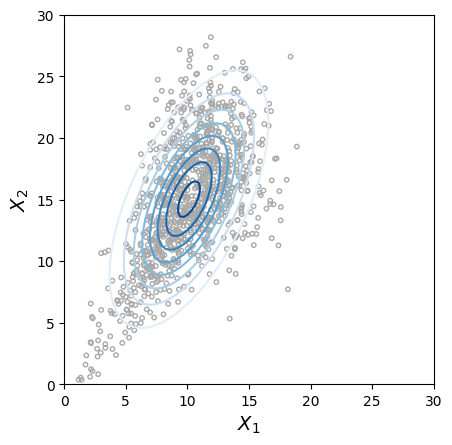

In [25]:
mean_vector = [data_x1.mean(), data_x2.mean()]
cov_matrix = [[data_x1.std()**2, covariance],
              [covariance, data_x2.std()**2]]
bivar_old = st.multivariate_normal(mean_vector, cov_matrix)
plot_contour(bivar_old, [0, 30, 0, 30], data=data.T);

In [26]:
bivar_dist = Bivariate(X1, X2, correl_coeff)
bivar_dist.rho

np.float64(0.5973746669468999)

Compare the two

In [27]:
sample = bivar_dist.rvs(size=5)
print(sample)


[[14.46546874  7.04049672]
 [ 7.72426828  5.85748152]
 [ 9.29950276 16.16946872]
 [ 7.85272536 17.33897078]
 [12.0543167  15.90831401]]


In [28]:
bivar_dist.rho

np.float64(0.5973746669468999)

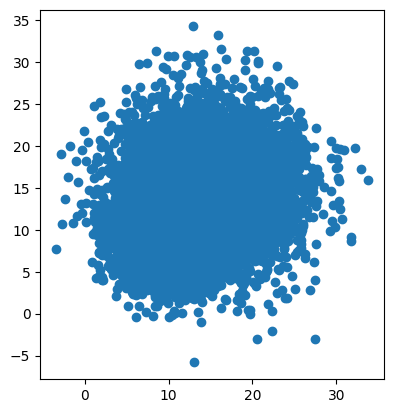

In [29]:
sample = bivar_dist.rvs(size=10000)
fig, ax = plt.subplots(1)
ax.scatter(sample[:,0], sample[:,1])
ax.set_aspect("equal")

In [30]:
comparison_point = [7, 5]
print(bivar_dist.pdf(comparison_point))
# print(bivar_old.pdf(comparison_point))
# print(bivar_old.cov[0,1]/np.sqrt(bivar_old.cov[0,0])/np.sqrt(bivar_old.cov[1,1]))
print(bivar_dist.rho)

0.00171913269912256
0.5973746669468999


Verify the new one

In [31]:
lower_left = bivar_dist.cdf([20, 20])
union = 1 - lower_left

left = X1.cdf(20)
bottom = X2.cdf(20)
intersection = 1 - (left + bottom - lower_left)

print(f'{lower_left:.5f}')
print(f'Case 1, Union: {union:.5f}')
print(f'{left:.5f}')
print(f'{bottom:.5f}')
print(f'Case 2, Intersection: {intersection:.5f}')

0.83567
Case 1, Union: 0.16433
0.99921
0.83575
Case 2, Intersection: 0.00072


In [32]:
N = data_x1.size

left = sum(data_x2 < 20)/N
bottom = sum(data_x1 < 20)/N
lower_left = sum((data_x1 < 20)*(data_x2 < 20))/N

union = 1 - lower_left
intersection = 1 - (left + bottom - lower_left)

print(f'{lower_left:.5f}')
print(f'Case 1, Union: {union:.5f}')
print(f'{left:.5f}')
print(f'{bottom:.5f}')
print(f'Case 2, Intersection: {intersection:.5f}')

0.83900
Case 1, Union: 0.16100
0.83900
1.00000
Case 2, Intersection: 0.00000


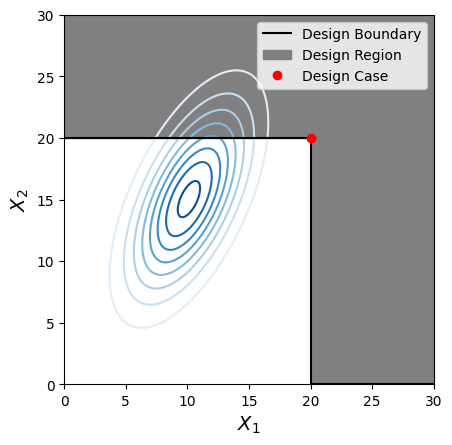

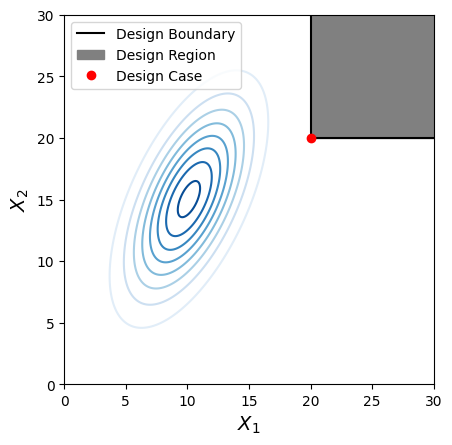

In [33]:
# region_or = np.array([[0, 20, 20, 30],
#                       [20, 20, 0, 0]])

# plot_contour(bivar_dist, [0, 30, 0, 30],
#              design_case = [20, 20],
#              design_region = region_or,
#             nb_points=400);

# region_and = np.array([[20, 20, 30],
#                       [30, 20, 20]])

# plot_contour(bivar_dist, [0, 30, 0, 30],
#              design_case = [20, 20],
#              design_region = region_and,
#             nb_points=400);